# Integrantes: 
Hellen Cristine Silva Rosa (RA00319076), João Victor Porto (RA00311353), Laura Gabriel Murayama (RA00319321), Maria Eduarda Bonel Iribarnegaray (RA00318891), Vinícius Ferreira de Mendonça (RA00319760), Vitória de Fátima Teixeira (RA00320578)

In [21]:
import numpy as np
import pandas as pd
from pyDOE2 import *
import seaborn as sns
import matplotlib.pyplot as plt

# Recursos
- [Catapulta](https://sigmazone.com/catapult/)
- [Documentação pyDOE2](https://pythonhosted.org/pyDOE/)
- [Tutorial de DOE com catapulta do Sigmazone](https://sigmazone.com/quantum_xl_doe_tutorial/#Step_1:_Setting_up_the_Designed_Experiment)
- [Response Optimization with Design of Experiments and python](https://towardsdatascience.com/response-optimization-with-design-of-experiments-and-python-63f9afb3f26f)
- [Youtube: Design of Experiments (DOE) - Minitab Masters Module 5](https://www.youtube.com/watch?v=rXmrMu-czM4)
- [Curso de Design of Experiments da PennState](https://online.stat.psu.edu/stat503/lesson/1)

## Realizando o experimento.
Colocamos as configurações de cada linha do dataframe na [catapulta](https://sigmazone.com/catapult/) para preencher a coluna `distance` e salvá-lo como um novo dataframe.

A planilha compartilhada está disponível no Google Sheets: [LHS](https://docs.google.com/spreadsheets/d/1e-EHZcRrpu5jy7baX_Z1_XDp0cppIyoXXveRIzQKk2E/edit#gid=1081657349) e [Box-Benhken](https://docs.google.com/spreadsheets/d/1gL6UifW3i-ZbZff8haHjBg8py-GPBVFXIqHzISFiOiQ/edit#gid=1572290238)

In [2]:
df1 = pd.read_csv("../df_catapulta_complete.csv")
# df1 = df1.dropna(ignore_index=True)
df1 = df1.dropna().drop('Unnamed: 0', axis=1)
df1 = df1.reset_index(drop=True)
df1['distance'] = df1['distance'].astype(int)
df1.shape

(48, 6)

In [3]:
df2 = pd.read_csv("../df_box_complete.csv")
df2 = df2.dropna().drop('Unnamed: 0', axis=1)
df2 = df2.astype(int)
df2.shape

(41, 6)

In [4]:
df = pd.concat([df1, df2])
df

,release_angle,firing_angle,cup_elevation,bungee_position,pin_elevation,distance
0,183,100,211,168,120,185
1,173,124,240,110,100,125
2,128,104,243,117,163,96
3,148,131,273,135,138,82
4,123,90,265,194,118,105
...,...,...,...,...,...,...
36,170,106,250,100,100,143
37,170,106,250,200,100,229
38,170,106,250,100,200,232
39,170,106,250,200,200,380


## Análise dos dados
Usamos a biblioteca `pyDOE2` para realizar a análise de variância, entre outras.

<Axes: >

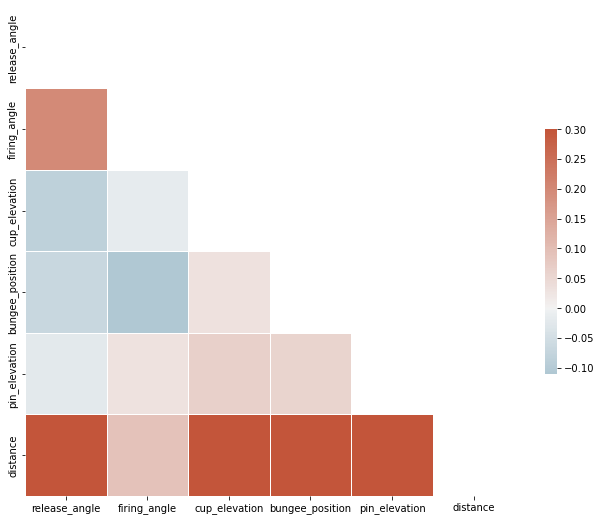

In [5]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


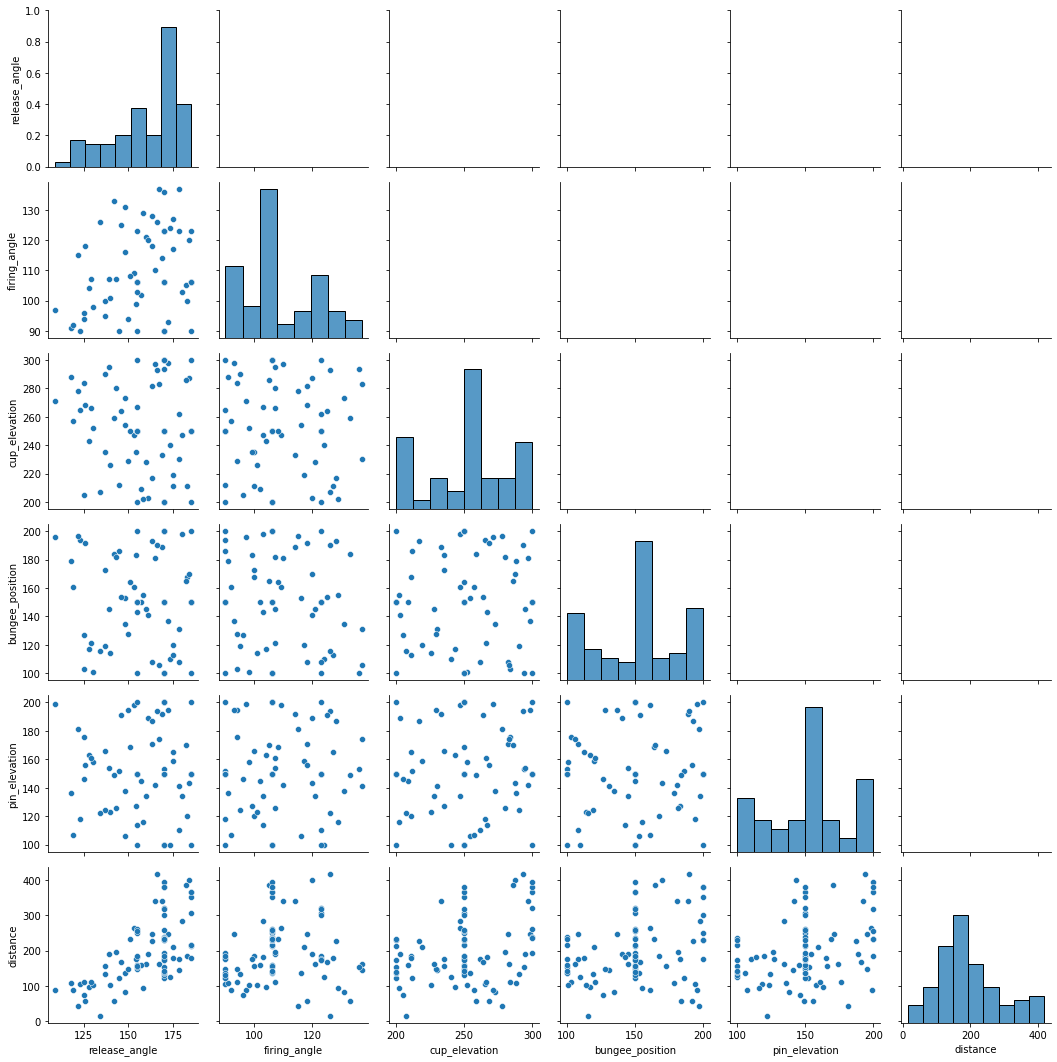

In [6]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

## ANOVA
Uma técnica estatística para comparar as médias de diferentes grupos em um experimento e determinar se as diferenças observadas são estatisticamente significativas. Ela ajuda a responder se os grupos são realmente diferentes ou se as diferenças observadas são devido ao acaso.

- Soma dos quadrados: representa a soma dos quadrados dos desvios em relação à média, representa a variabilidade total nos dados. É calculada como a soma dos desvios ao quadrado em relação à média total. Quanto maior o valor, maior é a contribuição do fator para a variação total.

- Quadrado médio: É calculado dividindo a soma dos quadrados pelo número de graus de liberdade correspondente. É uma medida da variabilidade média para cada fator. O Quadrado Médio Entre representa a variabilidade média entre os grupos, enquanto o Quadrado Médio Dentro representa a variabilidade média dentro dos grupos.

- Valor F: é a estatística de teste que compara a variabilidade entre grupos com a variabilidade dentro dos grupos. É calculado como a razão entre os quadrados médios dos fatores e o quadrado médio do erro. Valores maiores de F indicam uma maior diferença entre os grupos em relação à variabilidade dentro dos grupos.

- Valor p: é o valor p associado ao valor F calculado. Representa a probabilidade de obter um valor F igual ou mais extremo do que o observado, assumindo que a hipótese nula seja verdadeira. Um valor p baixo (geralmente abaixo de 0,05) indica evidências estatisticamente significativas de diferença entre os grupos.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
model = ols('distance ~ release_angle + firing_angle + cup_elevation + bungee_position + pin_elevation', data=df).fit()
anova_table = sm.stats.anova_lm(model)

anova_table

,df,sum_sq,mean_sq,F,PR(>F)
release_angle,1.0,288082.335751,288082.335751,131.182859,9.089624e-19
firing_angle,1.0,780.659794,780.659794,0.355486,5.526467e-01
cup_elevation,1.0,107844.562840,107844.562840,49.108731,5.899422e-10
bungee_position,1.0,83385.571413,83385.571413,37.970942,2.469688e-08
pin_elevation,1.0,74597.038226,74597.038226,33.968944,1.034399e-07
Residual,83.0,182271.022987,2196.036422,NaN,NaN


- release_angle: Uma soma de quadrados (sum_sq) de 288082.335751. O quadrado médio (mean_sq) de 288082.335751. O valor F é de 131.182859 e o valor p é muito baixo (9.089624e-19), indicando que o ângulo de lançamento é altamente significativo na explicação da variação na distância percorrida.

- firing_angle: Soma de quadrados de 780.659794 e um quadrado médio de 780.659794. O valor F é de 0.355486 e o valor p é relativamente alto (5.526467e-01), indicando que o ângulo de disparo não é estatisticamente significativo na explicação da variação na distância.

- cup_elevation: Soma de quadrados de 107844.562840 e um quadrado médio de 107844.562840. O valor F é de 49.108731 e o valor p é muito baixo (5.899422e-10), indicando que a elevação da xícara é altamente significativa na explicação da variação na distância.

- bungee_position: Soma de quadrados de 83385.571413 e um quadrado médio de 83385.571413. O valor F é de 37.970942 e o valor p é muito baixo (2.469688e-08), indicando que a posição do bungee é altamente significativa na explicação da variação na distância.

- pin_elevation: Soma de quadrados de 74597.038226 e um quadrado médio de 74597.038226. O valor F é de 33.968944 e o valor p é muito baixo (1.034399e-07), indicando que a elevação do pino é altamente significativa na explicação da variação na distância.

In [18]:
# Variáveis independentes
x1 = df['release_angle']
x2 = df['firing_angle']
x3 = df['cup_elevation']
x4 = df['bungee_position']
x5 = df['pin_elevation']

# Variável dependente
y = df['distance']

# Cria um DataFrame com as variáveis
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'y': y})

# Cria o modelo de ANOVA
formula = 'y ~ x1 + x2 + x3 + x4 + x5 + x1:x2 + x1:x3 + x1:x4 + x1:x5 + x2:x3 + x2:x4 + x2:x5 + x3:x4 + x3:x5 + x4:x5'
model = ols(formula, data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Realiza a ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
x1,338727.672956,1.0,288.238654,4.657503e-27
x2,8.516265,1.0,0.007247,9.323922e-01
x3,95829.206087,1.0,81.545393,1.634241e-13
x4,84932.416880,1.0,72.272824,1.607983e-12
x5,73997.130724,1.0,62.967496,1.863699e-11
x1:x2,39170.989410,1.0,33.332362,1.765218e-07
x1:x3,4889.821647,1.0,4.160970,4.498474e-02
x1:x4,19766.066350,1.0,16.819837,1.055489e-04
x1:x5,5097.788723,1.0,4.337938,4.077565e-02
x2:x3,167.592358,1.0,0.142612,7.067939e-01


- release_angle: tem um valor F de 288.238654 e um valor p muito baixo (4.657503e-27), indicando que é altamente significativo na explicação da variação. 

- firing_angle: tem um valor F muito baixo (0.007247) e um valor p alto (0.9323922), indicando que não é estatisticamente significativo.

- cup_elevation: Tem um valor F de 81.545393 e um valor p muito baixo (1.634241e-13), indicando que é altamente significativo na explicação da variação na distância percorrida.

- bungee_position: Tem um valor F de 72.272824 e um valor p muito baixo (1.607983e-12), indicando que é altamente significativo na explicação da variação na distância percorrida.

- pin_elevation: Tem um valor F de 62.967496 e um valor p muito baixo (1.863699e-11), indicando que é altamente significativo na explicação da variação na distância percorrida.

Todas as interações estão indicando uma significância estatística na interação desses dois fatores.

A última linha da tabela, com o rótulo "Residual", representa a variação não explicada pelos fatores e interações. Essa parcela de variação é atribuída ao erro ou à variabilidade aleatória não explicada pelo modelo.

## Otimização
Técnica de Análise de Superfície de Resposta (RSM) para achar a melhor configuração da catapulta.


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.optimize import minimize

In [11]:
# Variáveis independentes
x = df[['release_angle', 'firing_angle','cup_elevation', 'bungee_position', 'pin_elevation']]

# Variável de resposta
y = df['distance']

# Divide dataset em variáveis de treinamento e de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

Ao utilizar a técnica de análise de superfície de resposta (RSM), transformar as variáveis de teste em um polinômio permite capturar relações não lineares entre os fatores e a resposta. É uma forma de expandir o espaço de recursos e levar em consideração possíveis interações e efeitos não lineares entre as variáveis.

In [12]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [13]:
# Treina o modelo
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predições
y_pred = model.predict(x_test_poly)

In [14]:
# Avalia o desempenho do modelo. Quanto menor o MSE, melhor.
mse = mean_squared_error(y_test, y_pred, squared=False)
mse

21.914532051495193

In [15]:
def objective_function(config):
	config_poly = poly.transform([config])  # Transforma as variáveis de entrada em polinômios
	predicted_distance = model.predict(config_poly)[0]
	return -predicted_distance

min_values = [90, 90, 200, 100, 100]
max_values = [185, 140, 300, 200, 200]

constraints = [
	{'type': 'ineq', 'fun': lambda x: x[0] - min_values[0]},  # release_angle - lower_limit
	{'type': 'ineq', 'fun': lambda x: max_values[0] - x[0]},  # upper_limit - release_angle
	{'type': 'ineq', 'fun': lambda x: x[1] - min_values[1]},  # firing_angle - lower_limit
	{'type': 'ineq', 'fun': lambda x: max_values[1] - x[1]},  # upper_limit - firing_angle
	{'type': 'ineq', 'fun': lambda x: x[2] - min_values[2]},  # cup_elevation - lower_limit
	{'type': 'ineq', 'fun': lambda x: max_values[2] - x[2]},  # upper_limit - cup_elevation
	{'type': 'ineq', 'fun': lambda x: x[3] - min_values[3]},  # bungee_position - lower_limit
	{'type': 'ineq', 'fun': lambda x: max_values[3] - x[3]},  # upper_limit - bungee_position
	{'type': 'ineq', 'fun': lambda x: x[4] - min_values[4]},  # pin_elevation - lower_limit
	{'type': 'ineq', 'fun': lambda x: max_values[4] - x[4]},  # upper_limit - pin_elevation
]

initial_config = np.array(min_values)
result = minimize(objective_function, initial_config, method='SLSQP', constraints=constraints)

c:\Users\Laura\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Laura\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Laura\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Laura\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Laura\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Laura\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X d

Percebe-se que `firing_angle` é o único fator que não está no nível máximo para atingir a maior distância

In [16]:
if result.success:
	optimal_config = result.x
	optimal_distance = -result.fun
	print("Configuração Ótima:")
	print(optimal_config)
	print("Distância Ótima:")
	print(optimal_distance)

Configuração Ótima:
[185.         123.39508995 300.         200.         200.        ]
Distância Ótima:
587.6965180142731
